### Урок 3. Классификация. Логистическая регрессия

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [7]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [8]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [9]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [10]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [11]:
z = np.linspace(-10, 10, 101)

In [12]:
probabilities = sigmoid(z)

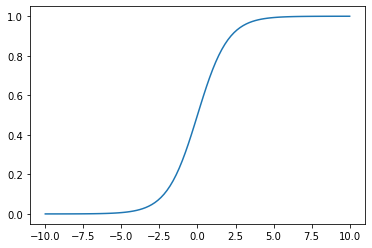

In [13]:
plt.plot(z, probabilities)
plt.show()

In [14]:
Logistic Regression

SyntaxError: ignored

In [15]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W.copy()

In [16]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.7651177745022372
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105476
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442176
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515639
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.5532737788236779


## Практическое задание

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.


In [28]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

def calc_logloss_modify(y, y_pred, shift = 1e-07):
    modify_y_pred = np.where(y_pred == 0, y_pred + shift, np.where(y_pred == 1, y_pred - shift, y_pred))
    err = - np.mean(y * np.log(modify_y_pred) + (1.0 - y) * np.log(1.0 - modify_y_pred))
    return err

In [30]:
y_pred_tmp=np.array([0.56505739, 0., 0.73651677, 0.55438552, 1.,
       0.57898984, 1, 0.5133091 , 0., 0.7149758 ])

print(f'Результат работы обычного logloss: {calc_logloss(y, y_pred_tmp)}')
print(f'Результат работы модифицированного logloss: {calc_logloss_modify(y, y_pred_tmp, shift = 1e-07)}')

Результат работы обычного logloss: nan
Результат работы модифицированного logloss: 1.998549246271266


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [45]:
def eval_model_modify(X, y, iterations, alpha = 1e-4, eps = 1e-5):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    min_err = float('inf') 

    i = 0  
    iter_flag = True  
    while iter_flag:
        i += 1
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss_modify(y, y_pred, shift = 1e-07) # заменим на модифицированную нами функцию
        
        if np.abs(min_err - err) > eps:  
            min_err = err
        else:            
            iter_flag = False
        
        if i >= iterations:
            iter_flag = False
        
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))

        if i % (iterations / 10) == 0:
            print(f'Выполнено итераций: {i}, веса: {W}, ошибка: {min_err}')

    return W.copy(), i, err

In [47]:
W, it, err = eval_model_modify(X_st, y, iterations=100000, alpha=0.095)
print(f'Выполнено итераций: {it}, веса: {W}, ошибка: {err}')


Выполнено итераций: 5542, веса: [-7.66677608 -1.15333097 -1.44957044  6.71441096], ошибка: 0.2669375419192318


Подбор параметра $\alpha$

In [48]:
def float_range(start, stop, step): # Генератор дробных значений между start и stop. Для экономии памяти.
  while start < stop:
    yield float(start)
    start = start + step

In [52]:
best_parameters = {'alpha':np.float64(0.0), 'n':np.float64(100000.09), 'err':float('inf')}
iter = float_range(0.01, 0.99, 0.01)

cnt = 0
while 1:
    try: alpha = next(iter)   
    except StopIteration:    # Больше нет элементов
        break
    
    cnt += 1

    W, it, err = eval_model_modify(X_st, y, iterations=100000, alpha = alpha)
    if err < best_parameters['err'] or (err == best_parameters['err'] and it < best_parameters['n']):
        best_parameters['alpha'] = alpha
        best_parameters['n'] = it
        best_parameters['err'] = err

    if cnt % 100 == 0:
        print(best_parameters)

print(best_parameters)


{'alpha': 0.9800000000000006, 'n': 4899, 'err': 0.14578495072929415}


Более тонкая настройка $\alpha$

In [55]:
best_parameters = {'alpha':np.float64(0.0), 'n':np.float64(100000.09), 'err':float('inf')}
iter = float_range(0.97, 1, 0.0001)

cnt = 0
while 1:
    try: alpha = next(iter)   
    except StopIteration:    # Больше нет элементов
        break
    
    cnt += 1

    W, it, err = eval_model_modify(X_st, y, iterations=100000, alpha = alpha)
    if err < best_parameters['err'] or (err == best_parameters['err'] and it < best_parameters['n']):
        best_parameters['alpha'] = alpha
        best_parameters['n'] = it
        best_parameters['err'] = err

    if cnt % 100 == 0:
        print(best_parameters)

print(best_parameters)

{'alpha': 0.9798999999999989, 'n': 4899, 'err': 0.1457899962163048}
{'alpha': 0.9898999999999978, 'n': 4886, 'err': 0.14541845873487938}
{'alpha': 0.9998999999999967, 'n': 4873, 'err': 0.1450529752787767}
{'alpha': 0.9999999999999967, 'n': 4873, 'err': 0.14504805092093204}


В итоге, лучшее значение параметра $\alpha$ равно 0.9999. При этом достигается минимальное значение log loss = 0.145048


3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.


In [56]:
def calc_pred_proba(w, x): 
    pred_proba = sigmoid(np.dot(w, x))
    return pred_proba

In [57]:
W, _it, _err  = eval_model_modify(X_st, y, iterations=10000, alpha=0.9999, )

Выполнено итераций: 1000, веса: [-10.79341152  -1.38792507  -2.43584261   9.17320302], ошибка: 0.2317190953712965
Выполнено итераций: 2000, веса: [-15.46253393  -1.78447228  -3.83915297  12.94603196], ошибка: 0.19321057997090446
Выполнено итераций: 3000, веса: [-19.06030494  -2.1026944   -4.89280141  15.87012348], ошибка: 0.17040607901596902
Выполнено итераций: 4000, веса: [-22.02257707  -2.36829915  -5.74862278  18.2784113 ], ошибка: 0.15498329356374776


In [58]:
y_pred_prob = calc_pred_proba(W, X_st)
y_pred_prob

array([3.83512457e-01, 4.27582125e-02, 9.99998931e-01, 5.74511610e-06,
       8.76738241e-01, 1.35109715e-01, 9.99999912e-01, 3.99887082e-02,
       5.45818887e-01, 9.99971252e-01])

4. Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.

In [59]:
def calc_pred(w,x, prob_lim = 0.5):    # порог вероятности, при превышении которого, объект будет относиться к классу 1
    pred_proba = sigmoid(np.dot(w, x))
    pred = np.zeros_like(pred_proba)
    for idx, prob in enumerate(pred_proba):
        if prob > prob_lim:
            pred[idx] = 1
    return pred

In [60]:
y_pred=calc_pred(W, X_st)
y_pred

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

In [73]:
def custom_accuracy(real, pred):
    trues = np.sum(real-pred == 0) 
    return trues / len(real) 
        

In [71]:
custom_accuracy(y,y_pred) - accuracy_score(y,y_pred)

0.0

In [76]:
def custom_confusion_matrix(real, pred):
    n_classes=len(np.unique(real))
    all_res=len(real)
    conf_matr=np.zeros((n_classes,n_classes), dtype='int')
    for i in range(all_res):
        conf_matr[int(real[i])][int(pred[i])] += 1
    return conf_matr  
    

In [77]:
custom_confusion_matrix(y,y_pred) - confusion_matrix(y,y_pred)

array([[0, 0],
       [0, 0]])

In [79]:
def custom_precision_score(real, pred):
    tn, fp, fn, tp = custom_confusion_matrix(real, pred).ravel()
    return tp/(tp+fp)

In [80]:
custom_precision_score(y,y_pred) - precision_score(y,y_pred)

0.0

In [82]:
def custom_recall_score(real, pred):
    tn, fp, fn, tp = custom_confusion_matrix(real, pred).ravel()
    return tp/(tp+fn)

In [83]:
custom_recall_score(y,y_pred) - recall_score(y,y_pred)

0.0

In [85]:
def custom_f1_score(real, pred, beta=1):
    return (1+beta**2)*custom_precision_score(real, pred)*custom_recall_score(y,y_pred)/(beta**2*custom_precision_score(real, pred)+custom_recall_score(y,y_pred))

In [86]:
custom_f1_score(y,y_pred) - f1_score(y,y_pred)

0.0

6. Могла ли модель переобучиться? Почему?

Может, т.к. использует сигмоиду. А сигмоида не имеет максимума и минимума. В результате чего градиентный спуск не сможет достичь оптимального решения.